$$\Huge{\text{ DSC 521 Module 2}}$$
$$\huge{\text{Learning/Overfitting/Classifiers}}$$

#  Gradient of MSE Chapter 4 






<font size=4> This week we will look at regression and find techniques to avoid over-fitting.Lets run our initializations to get started.

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import sklearn



<font size=4>__Partial Derivatives and Gradient__ Let $F(x,y)=(x-3y-2)^2+(x-4y-5)^2$.  Let's use the chain rule and treating the other variable like a constant to compute these partial derivatives.   

$\frac{\partial F}{\partial x}=2(x-3y-2)+2(x-4y-5)$

<br>

$\frac{\partial F}{\partial y}=2(x-3y-2)(-3)+2(x-4y-5)(-4)$

$\nabla F(x,y)=\begin{bmatrix}{\frac{\partial F}{\partial x}}\\{\frac{\partial F}{\partial y}}\end{bmatrix}=\begin{bmatrix} 2(x-3y-2)+2(x-4y-5)\\2(x-3y-2)(-3)+2(x-4y-5)(-4)\end{bmatrix} $ 

$\nabla F(1,2)=\begin{bmatrix} 2(1-3*2-2)+2(1-4*2-5)\\2(1-3*2-2)(-3)+2(1-4*2-5)(-4)\end{bmatrix}=\begin{bmatrix} ?\\?\end{bmatrix}  $

<font size=4>
    
__Regression Basics__


We found  the $\theta$s fo the model $h_\theta(x)=\theta_0+\theta_1 x$ in three different ways in Week 1.  
 * We let Scikit-Learn  produce them    
 * We solved the normal equation
 $(X^TX){\Theta}=X^T{\bf y}$  which in most cases has a solution of  ${\Theta}= (X^TX)^{-1}X^T{\bf y}$.
 
 * We used Gradient Descent to have the __"Machine Learn"__ what the $\theta$ were.  Let's dive in a little deeper.

In this case our design matrix was $$X^T=\begin{bmatrix} 1 &1 &1  &\dots &1\\ x_1 &x_2 &x_3 &\dots &x_m\end{bmatrix}$$

Mathematically, we are finding $\theta_0$ and $\theta_1$ so that given the set of points $\{ (x_i,y_i)\}_{i=1}^m$ the function $h_\theta(x)=\theta_0+\theta_1 x$ minimizes the __Mean Square Error (MSE)__, i.e. if we let $\Theta =\begin{bmatrix} \theta_0\\ \theta_1\end{bmatrix}$  $$J(\Theta)=\frac{1}{m} \sum_{i=1}^m |h_\theta(x_i)-y_i|^2 \text { or in $\ell_2$ norm and matrix notation } \frac{1}{m}\|X\Theta-{\bf y}\|_2^2 $$ 

__Derivation of The Gradient for $J(\Theta)$__

Let's do a simple case where we only have three points to motivate the derivation.   

$$J(\Theta)=\frac{1}{3} \left( (\theta_0  +\theta_1 x_1-y_1)^2 + (\theta_0  +\theta_1 x_2-y_2)^2+ (\theta_0  +\theta_1 x_3-y_3)^2\right)$$

What is the gradient? The first row of the vector is the derivative of $J$ with respect to $\theta_0$ and the second is the derivative of $J$ with respect to $\theta_1$.

$$\begin{align*}\nabla J &=\begin{bmatrix}{\frac{\partial J}{\partial \theta_0}}\\{\frac{\partial J}{\partial \theta_1}}\end{bmatrix} \\ &= \frac{1}{3} \begin{bmatrix}2(\theta_0  +\theta_1 x_1-y_1)+2(\theta_0  +\theta_1 x_2-y_2)+2(\theta_0  +\theta_1 x_3-y_3) \\ 2x_1(\theta_0  +\theta_1 x_1-y_1)
+2x_2(\theta_0  +\theta_1 x_2-y_2)
+2x_3(\theta_0  +\theta_1 x_3-y_3) \end{bmatrix}\\
 &=\frac{2}{3}  \begin{bmatrix} 1& 1 &1\\x_1&x_2&x_3 \end{bmatrix} \begin{bmatrix}\theta_0  +\theta_1 x_1-y_1\\ \theta_0  +\theta_1 x_2-y_2\\ \theta_0  +\theta_1 x_3-y_3\end{bmatrix}\\
 &=\frac{2}{3} X^T(X\Theta-{\bf y})\end{align*}$$
 
 If we have $m$ points the Gradient generalizes to 
    
 
 $$\begin{align*}\nabla J &=  \begin{bmatrix}2\sum_{j=1}^m(\theta_0+\theta_1x_j-y_j)\\2\sum_{j=1}^nx_j(\theta_0+\theta_1x_j-y_j)\end{bmatrix}\\ &=\frac{2}{m}X^T(X\Theta-{\bf y})\end{align*}\\ $$
 
When we implement this in code we usually drop the  $\frac{2}{m}$ and incorporate it into the $\lambda$ so our gradient decent in this __MSE__  becomes

$$ \Theta_{n+1}=\Theta_{n}-\gamma X^T(X\Theta_n-{\bf y})$$


# SGD- Batch, Stochastic, Mini Batch: Chapter 4

<font size =4> __Definitions And Advantages: We will revist when we do NN__  
    
Read pages 118 -128

<font size=4>
    
__Batch Gradient Descent__  By this we mean that we used all the training data at each iteration(epoch) of the update 

$$W_{n+1}=W_n+\gamma X^T(error)=W_n-\gamma X^T(XW-y)$$

__Stochastic Gradient Descent__ we only use one randomly chosen row of X and it corresponding error vector to preform the update.


$$W_{n+1}=W_n-\gamma X_j^T(error_j)$$

__Mini-Batch Gradient Descent__ we only use a small subset of  randomly chosen rows of X and there corresponding error vectors to preform the update.

$$W_{n+1}=W_n-\gamma X_{j_{10}}^T(error_{j_{10}})$$

Let's edit  the code from last week where we did a regression for the iris data using petal width to predict petal length.  Change from Batch, to Stochastic to Mini Batch Gradient Descent(10 samples).  Load the data and  discuss the dimensions and recall our code for batch last week.

    
We will do 

* Batch $M=150$
* Stochastic $M=1$
* Mini- Batch $2\le M \le 150$

<font color = blue>__Note 1: Both max _iter and lam may need to change as you change batch size to get it to converge__

<font color = blue>__Note 2: We will give up some accuracy when using Stochastic or Mini_Batch GD but for large data sets it may by necessary to get reasonable training times. With a few more bells and whistles (like a learning schedule) we can regain some of the accuracy.__
    
We will apply these to the problem in Exercise one where we used sklearn to get coefficients for a regression line modeling the relation between pedal length and pedal with using the iris data set. 
        -0.3630755213190291 0.41575541635241153
    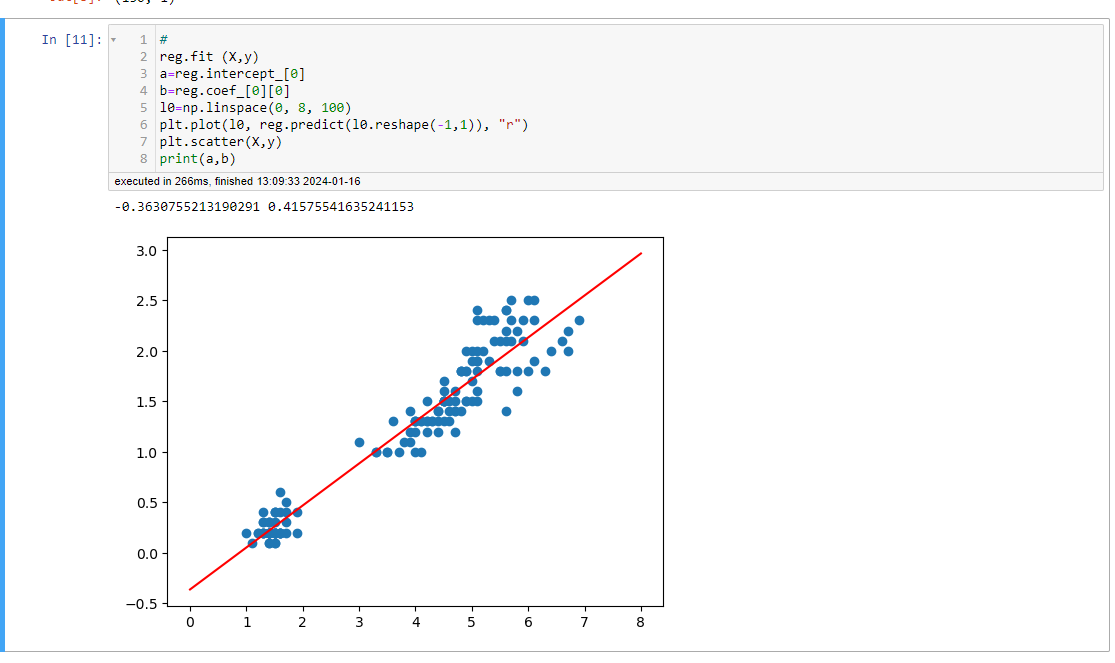

## Example Batch for Problem 

<font size =4>  We feed Gradient Descent all the flower measurements at a each iteration. 

In [2]:
#
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())
X=iris.data[:,2].reshape(150,1)
y=iris.data[:,3].reshape(150,1)
on1=np.ones(150)
X1=np.c_[on1,X]


In [3]:
X1.shape

(150, 2)

In [4]:
#
np.random.seed(42)
C=np.random.random((2,1))# different initial guess can affect convergence
max_iter = 2000 #affects convergence
lam=.0005 #affects convergence
for t in range(0, max_iter):
    grad_t=X1.T.dot(X1.dot(C)-y)
    C = C - lam*grad_t
    #print(C)
    
print(C)

[[-0.36307552]
 [ 0.41575542]]


## Stochastic

<font size =4>  We feed Gradient Descent one set of flower measurements at a time. 
    
    -0.3630755213190291 0.41575541635241153

In [5]:
M=1 #batch size Need to change max_iter as change M

np.random.seed(44)
C=np.random.random((2,1))# different initial guess can affect convergence
max_iter = 1000000 #affects convergence
lam=.005 #affects convergence

for t in range(0, max_iter):
    ind=np.random.randint(150,size=M)# determines size of batch
    error=X1[ind].dot(C)-y[ind]
    grad_t=X1[ind].T.dot(error)
    C = C - lam*grad_t
    #print(C)
    
print(C)

[[-0.35711238]
 [ 0.40816053]]


In [6]:
X1[ind]

array([[1. , 4.2]])

## Mini- Batch

<font size=4> We feed GD 10( or other number) measurements at a time. 
   
    -0.3630755213190291 0.41575541635241153

In [7]:
M=10 #batch size Need to change max_iter as change M

np.random.seed(42)
C=np.random.random((2,1))# different initial guess can affect convergence
max_iter = 100000 #affects convergence
lam=.0001 #affects convergence

for t in range(0, max_iter):
    ind=np.random.randint(150,size=M)# determines size of batch
    error=X1[ind].dot(C)-y[ind]
    grad_t=X1[ind].T.dot(error)
    C = C - lam*grad_t
    #print(C)
    
print(C)

[[-0.36431958]
 [ 0.41529873]]


    -0.3630755213190291 0.41575541635241153

# K-fold Cross Validation
    
<font size =4> Lets consider the Aimes housing set.  https://inria.github.io/scikit-learn-mooc/python_scripts/datasets_ames_housing.html  **We want to predict the SalePrice.**

In [8]:
#from sklearn import datasets
#bhous = datasets.load_boston()

In [9]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
######################################### linear
reg=linear_model.LinearRegression()
from sklearn.datasets import fetch_openml

aimes= fetch_openml(name="house_prices", as_frame=True,parser='auto')
list(aimes.keys())

['data',
 'target',
 'frame',
 'categories',
 'feature_names',
 'target_names',
 'DESCR',
 'details',
 'url']

In [10]:
all_aimes=aimes.data.join(aimes.target)
all_aimes.corr()['SalePrice']

Id              -0.021917
MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
Name: SalePr

In [11]:
X=np.array(aimes.data['GrLivArea']).reshape(-1,1)

y=np.array(aimes.target).reshape(-1,1)


## 5 Fold Cross validation for  line

R^2 on all data we trained on 0.5021486502718042


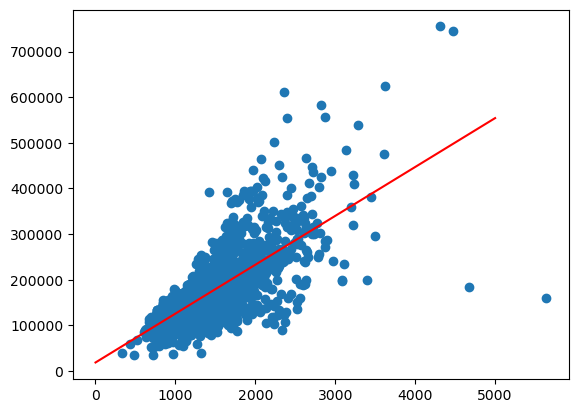

In [12]:
poly_f=PolynomialFeatures(degree=1,include_bias=False)

X_poly=poly_f.fit_transform(X)
reg.fit(X_poly,y)
plt.scatter(X,y)
l0=np.linspace(1, 5000, 100)
l1=l0.reshape(-1,1)
L1=poly_f.fit_transform(l1) 
plt.plot(l1, reg.predict(L1), "r")
print("R^2 on all data we trained on",reg.score(X,y)) 

<font size =4> The main idea is to see how well the model performs when we only train on part of it and test on the remaining part. 

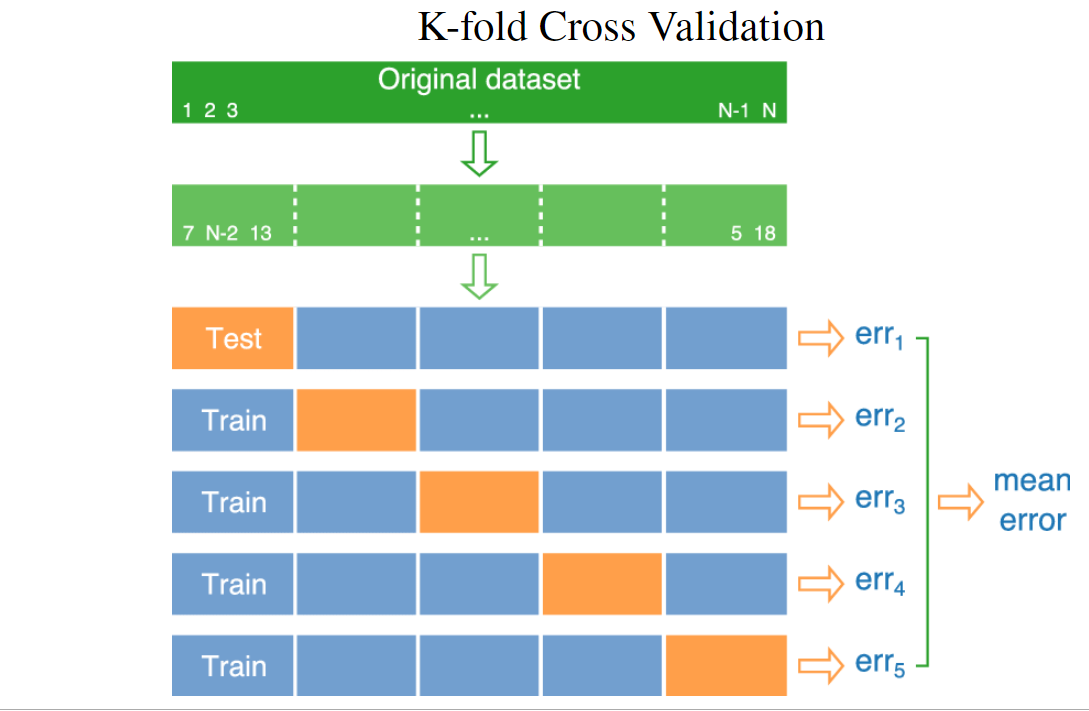

In [13]:
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(reg, X, y, cv=5
                    , scoring='r2')
print("R^2 for each  fold of the cross validation ",cvs)
print("Average of the R^2  scores",np.mean(cvs))

R^2 for each  fold of the cross validation  [0.56327261 0.52651571 0.54831185 0.46293328 0.36838946]
Average of the R^2  scores 0.4938845802169567


## 5- Fold Cross Validation for Cubic  

R^2 on all data we trained on 0.520928204824646


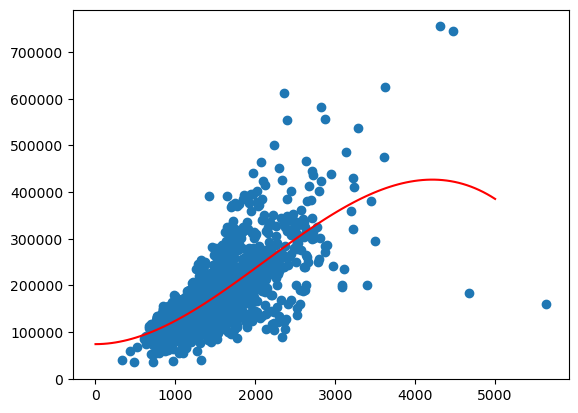

In [14]:
poly_f=PolynomialFeatures(degree=3,include_bias=False)
X_poly=poly_f.fit_transform(X)
reg.fit(X_poly,y)
plt.scatter(X,y)

l0=np.linspace(1, 5000, 100)
l1=l0.reshape(-1,1)
L1=poly_f.fit_transform(l1) 
plt.plot(l1, reg.predict(L1), "r")
print("R^2 on all data we trained on",reg.score(X_poly,y)) 

In [15]:
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(reg, X_poly, y, cv=5, scoring='r2')
print("R^2 for each  fold of the cross validation ",cvs)
print("Average of the R^2  scores",np.mean(cvs))

R^2 for each  fold of the cross validation  [0.566944   0.55109691 0.53541554 0.45411695 0.44122144]
Average of the R^2  scores 0.5097589680861487


## 5- Fold Cross Validation for polynomial of degree 7 

R^2 on all data we trained on 0.5169232903270697


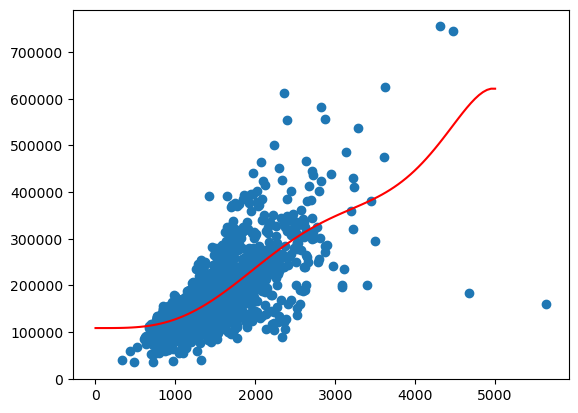

In [16]:
poly_f=PolynomialFeatures(degree=7,include_bias=False)
X_poly=poly_f.fit_transform(X)
reg.fit(X_poly,y)
plt.scatter(X,y)

l0=np.linspace(1, 5000, 100)
l1=l0.reshape(-1,1)
L1=poly_f.fit_transform(l1) 
plt.plot(l1, reg.predict(L1), "r")
print("R^2 on all data we trained on",reg.score(X_poly,y)) 

In [17]:
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(reg, X_poly, y, cv=4, scoring='r2')
print("R^2 for each  fold of the cross validation ",cvs)
print("Average of the R^2  scores",np.mean(cvs))

R^2 for each  fold of the cross validation  [  0.56616107   0.39528954   0.48393201 -36.85821939]
Average of the R^2  scores -8.853209189716447


# SGD Classifier, Cross Validation and Train Test Split. Chapter 3

<font size=4>  First let's get the [digits data set](https://en.wikipedia.org/wiki/MNIST_database) and take a look. It took me  30 seconds to load.

In [82]:
#Import Data
from sklearn import datasets
digits = datasets.load_digits()
list(digits.keys())

['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR']

In [83]:
X, y = digits["data"],digits["target"]
#X=X.to_numpy()
X.shape


(1797, 64)

<font size=4> Why 64 if these are pictures of digits?  What is $8^2$?  How many digits do we have? What is the shape of y? Check 

In [84]:
y.shape

(1797,)

<font size =4>  Let's plot after we reshape.

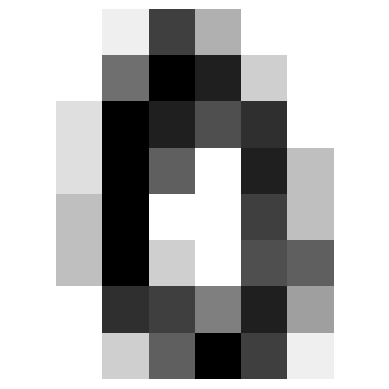

0

In [85]:
# Plot a digit after reshaping
some_digit = X[101]# change number for different digits
some_digit_image = some_digit.reshape(8, 8)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
           interpolation="nearest")
plt.axis("off")
plt.show()
y[101]# label-change number for different digits

In [86]:
np.min(X),np.max(X),2**4


(0.0, 16.0, 16)

## Preparing Data

### Train-Test Split

<font size =4>   We need to divide our data  into [train and test](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) . <font size=4> The code below sets aside 20% of the data to test our model and 80% to train on.

### Scaling
<br>    
<font size=4>Different features can have different units.  For example, what if the iris data set had the pedal length measured in inches and the pedal width measure in feet.  This can throw of the importance of the feature.  Another thing that we may wont to try and even out is the amount of variance in the feature.  Here are a couple of comon scaling techniques that address some of these issues.     

[Standard Scaling](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html)

$$ z_i=\frac{x_i-\bar x}{\sigma}$$
    
<br>
    
where $\bar x$ is the mean of the whole data set $X$ and $\sigma=\sqrt{\sum_{i=1}^N(x_i-\bar x)^2}$  is the standard deviation.  
 

[Min Max Scaling](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing). 

$$xmm_i=\frac{x_i-min(X)}{max(X)-min(X)} \text{ in the case } min(X)=0 \text{ we just get } xmm_i=\frac{x_i}{max(X)}$$


In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [57]:

#scaler.mean_, scaler.var_
#scaler.var_.shape

## <font size =4> [SGDClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)

<font size =4> 



* The default classifier is a [Support Vector Machine](https://en.wikipedia.org/wiki/Support_vector_machine)  That is the Loss function that the SGD classifier is minimizing is [Hinge Loss](https://en.wikipedia.org/wiki/Hinge_loss). 
    
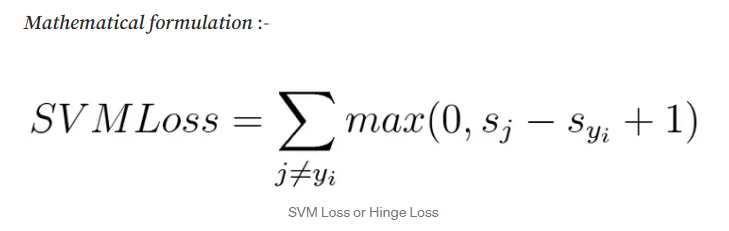    
See [Other Loss functions](https://scikit-learn.org/stable/auto_examples/linear_model/plot_sgd_loss_functions.html?highlight=hinge%20loss). We will train the SGD classifier on the training set and do a 3 fold cross validation. </font> 

In [88]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)
from sklearn.model_selection import cross_val_score
scores=cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")
print("scores", scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

scores [0.93319415 0.95824635 0.91858038]
Accuracy: 0.94 (+/- 0.03)


In [89]:
sgd_clf.coef_.shape, sgd_clf.intercept_.shape



((10, 64), (10,))

<font size=4> That looks pretty good but let look a little closer. How does it perform on our test set?

In [60]:
sgd_clf.score(X_test,y_test)

0.9527777777777777

<font size=4> A Closer look
    
[Confusion Matrix ](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html).
    
A more detailed  way to evaluate the performance of a classifier is to look at the confusion matrix. The
general idea is to count the number of times instances of class A are classified as class B. For example, to
know the number of times the classifier confused images of 5s with 3s, you would look in the 5th row and
3rd column of the confusion matrix. <font color =red>__So the row is the actual value and the column is the predicted value.__

In [64]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)
conf_mx=confusion_matrix(y_train, y_train_pred)
print(pd.DataFrame(conf_mx))

     0    1    2    3    4    5    6    7    8    9
0  143    0    0    0    0    0    1    0    1    0
1    0  140    0    2    0    0    1    0    7    4
2    0    1  136    2    0    0    0    1    4    0
3    0    0    0  132    0    4    0    4    8    1
4    0    4    0    0  125    0    0    1    4    1
5    0    0    0    0    0  127    0    2    3    3
6    0    1    0    0    0    0  142    0    3    0
7    0    0    0    1    2    0    0  138    3    1
8    0    7    0    2    0    0    0    0  135    0
9    0    2    0    3    0    2    0    1    4  128


<font size=4>Let's check a few more things related to this confusion matrix. To make sure we are giving it enough of each digit to train we can count the sum of all the rows.

In [65]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
row_sums

array([[145],
       [154],
       [144],
       [149],
       [135],
       [135],
       [146],
       [145],
       [144],
       [140]], dtype=int64)

<font size=4> Looks like a reasonable mix . There  more 1's then 5's though?  Any guesses how this may negatively effect my model?  Let's compute some percentages. What do we need to do to our confusion matrix 

In [66]:
#percentages
norm_conf_mx = conf_mx / row_sums
print(pd.DataFrame(100*np.round(norm_conf_mx,3)))

      0     1     2     3     4     5     6     7     8     9
0  98.6   0.0   0.0   0.0   0.0   0.0   0.7   0.0   0.7   0.0
1   0.0  90.9   0.0   1.3   0.0   0.0   0.6   0.0   4.5   2.6
2   0.0   0.7  94.4   1.4   0.0   0.0   0.0   0.7   2.8   0.0
3   0.0   0.0   0.0  88.6   0.0   2.7   0.0   2.7   5.4   0.7
4   0.0   3.0   0.0   0.0  92.6   0.0   0.0   0.7   3.0   0.7
5   0.0   0.0   0.0   0.0   0.0  94.1   0.0   1.5   2.2   2.2
6   0.0   0.7   0.0   0.0   0.0   0.0  97.3   0.0   2.1   0.0
7   0.0   0.0   0.0   0.7   1.4   0.0   0.0  95.2   2.1   0.7
8   0.0   4.9   0.0   1.4   0.0   0.0   0.0   0.0  93.8   0.0
9   0.0   1.4   0.0   2.1   0.0   1.4   0.0   0.7   2.9  91.4


<font size=4> So it looks like it has a problem with 3s.  What does it misclassify it the most as? Let's just look at percent right for each class.  And plot them.  What do we need to plot?

array([0.9862069 , 0.90909091, 0.94444444, 0.88590604, 0.92592593,
       0.94074074, 0.97260274, 0.95172414, 0.9375    , 0.91428571])

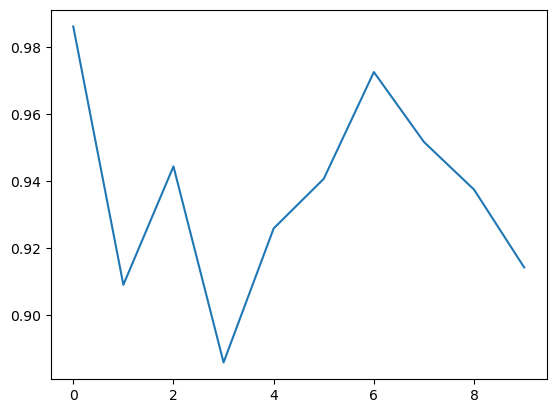

In [30]:
#percent right
plt.plot(np.diag(norm_conf_mx))
np.diagonal(norm_conf_mx)


<font size=4> All though it does really well on ones, there does not seem to b e a 1-1 correspondence between the number of  that digit and the accuracy of the model so this alone is not creating misclassification.



# Logistic Regression For Classification.

<font size=4> Lets start by looking at an [example from Wikipedia](https://en.wikipedia.org/wiki/Logistic_regression)

In this example they find parameters $\theta_0$ and $\theta_1$ so that 

$$h_\theta(x)=\sigma(\theta_0+\theta_1x)=\frac{1}{1+e^{-(\theta_0+\theta_1x)}}=\frac{1}{1+e^{-({\bf\theta\cdot x)}}}$$ 

__models the probability__ of passing an exam with $x$ being the number of hours a student studies for the exam.

__Example__

A group of 20 students spends between 0 and 6 hours studying for an exam. How does the number of hours spent studying affect the probability of the student passing the exam?

The reason for using logistic regression for this problem is that the values of the dependent variable, pass and fail, while represented by "1" and "0", are not cardinal numbers. If the problem was changed so that pass/fail was replaced with the grade 0–100 (cardinal numbers), then simple regression analysis could be used.

The table shows the number of hours each student spent studying, and whether they passed (1) or failed (0).

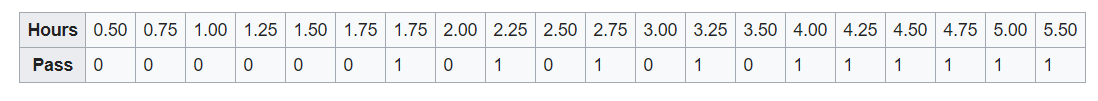

Fitting the model to the data(__how might we do that? how have we done it in other cases?__) they get  $$h_\theta(x)=\frac{1}{1+e^{-(1.5046x-4.0777)}}$$

So For example, for a student who studies 2 hours, entering the value $x=2$ in the equation gives the estimated probability of passing the exam of 0.26:

* ${\text{Probability of passing exam}}={\large\frac {1}{1+\exp \left(-\left(1.5046\cdot 2-4.0777\right)\right)}}=0.26$

Similarly, for a student who studies 4 hours, the estimated probability of passing the exam is 0.87:

* ${\text{Probability of passing exam}}={\large \frac {1}{1+\exp \left(-\left(1.5046\cdot 4-4.0777\right)\right)}}=0.87$

## Logistic Function (Sigmoid Function)

<font size=4> Let's recall the logistic function and some of it's properties.  The book and python use log for natural logarithm so we will too(ick). 

$$ \text{Two Different Forms and relationship with } \sigma(-t). \hspace{.2in} \sigma(t)=\frac{1}{1+e^{-t}}=\frac{e^t}{1+e^t}=1-\sigma(-t).$$

$$\text{Relationship with (natural) log.} \hspace{.2in} \text{Since }\frac{\sigma(t)}{1-\sigma(t)}=e^t \text{ we get } 
\log\left(\frac{\sigma(t)}{1-\sigma(t)}\right)= t.$$

$$\text{Derivative }\frac{d}{dt}\log (\sigma(t))=\sigma(-t) =1-\sigma(t)$$

In the example above we have $t=1.5046x-4.0777$ or $h(x)=\sigma(1.5046x-4.0777)$.

When $-(1.5046x-4.0777)=0$ or $x=2.7102$ my estimated probability is 50%. The effect of adding these coefficients to the function changes the curvature of the function and shits it to the right.  

<font color =blue> Mini Assignment:  See if you can verify these derivatives above by hand.  We will use Python.</font>

In [67]:
import sympy as sym
t = sym.symbols('t')
sig=lambda t: 1/(1+sym.exp(-t))
h=lambda t: sym.log(1/(1+sym.exp(-t)))
hprime=sym.diff(h(t),t)
hprime 

exp(-t)/(1 + exp(-t))

In [32]:
sym.simplify(1-sig(-t))

exp(t)/(exp(t) + 1)

In [33]:
sym.simplify(sig(-t))

1/(exp(t) + 1)

<font size=4> __Plots__

Lets look at the plot of $\sigma(x)$ and $h(x)=\sigma(1.5046x-4.0777)$ __This is our model for this data!__

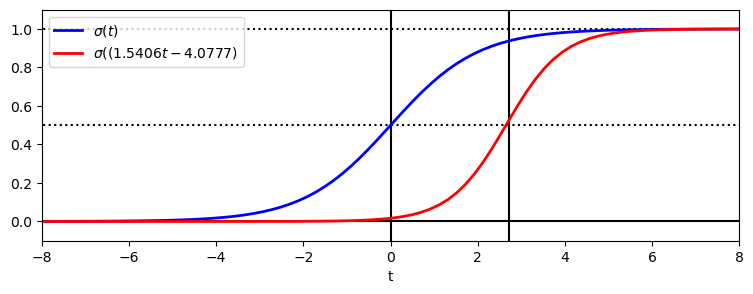

In [34]:
# Plots
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
sig2= 1 / (1+np.exp(-(1.5406*t-4.0777)))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-.1, 1.1], "k-")
plt.plot([2.71, 2.71], [-.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, 
         label=r"$\sigma(t)$")
plt.plot(t, sig2, "r-", linewidth=2, 
         label=r"$\sigma((1.5406t-4.0777) $")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=10)
plt.axis([-8, 8, -0.1, 1.1])
#save_fig("logistic_function_plot")
plt.show()

## Training the model to find $\Theta$

<font size=4>

The question becomes: What is the Loss/Cost function we optimize to get our $\theta_i$s? For simplicity, we will consider the case where __<font color=red> $h_\theta(x)=\sigma(\theta_0+\theta_1x) $</font>__. We will consider two cases.  One when $y_i=1$ and another when $y_i=0.$ Remember $h_\theta$ gives probabilities so $0 \le h_\theta \le 1$ and recall the log function is negative between 0 and 1.  Hence, we use $-\log$ to make the errors positive.   

* **Case 1 $y_i=1$: We want to have low error if the probability of passing is high and and high error of the probability of passing is low**

If the input $x_i$ has a label of 1, (i,e. y_i=1 or in the case of our example passing the test) we'll say the cost function of that input will be $$-\log(h_\theta(x_i)).$$  The higher the probability $h_\theta(x)$ is, the closer it is to 1 and $\log(1)$is zero. If on the other hand $h_\theta(x)$ is close to zero,the -log of this will tend to infinity indicating large error.  


* **Case 2 $y_i=0$ : We want to have high error if the probability of passing is high and and low error of the probability of passing is low**  


Similarly for an input $x_i$ that has a label of 0, (i,e. y_j=0 or in the case of our example, falling  the test) we'll say the cost function of that input will be $$-\log(1- h_\theta(x_j)).$$   

Since either $y_i$ or $1-y_i$ is zero, we use a clever trick/notation to add up these individual costs

$$\begin{align*}J(\theta)&=-\frac{1}{m}\sum_{i=1}^m \left[y_i\log(h_\theta(x_i))+(1-y_i)\log(1-h_\theta(x_i)) \right]\\
    & =-\frac{1}{m}\sum_{i=1}^m \left[y_i\log(\sigma(\theta_1x_i+\theta_0))+(1-y_i)\log(1-\sigma(\theta_1x_i+\theta_0)) \right]\\
    &=-\frac{1}{m}\sum_{i=1}^m \left[y_i\log(\sigma(\theta_1x_i+\theta_0))+(1-y_i)\log(\sigma(-(\theta_1x_i+\theta_0))) \right]\end{align*}$$


Next we need to figure out how to minimize.  We will rely on Gradient Descent. We use the chain rule, properties of $\sigma(t)$  and it's derivative to compute the gradient. 

## Log Loss function

$\begin{align*}\nabla J(\theta)&=\frac{-1}{m} {\Large \langle}\sum_{i=1}^m y_i(1-\sigma(\theta_1x_i+\theta_0))1+(1-y_i)(1-\sigma(-(\theta_1x_i+\theta_0)))(-1),\sum_{i=1}^m y_i(1-\sigma(\theta_1x_i+\theta_0))x_i+(1-y_i)(1-\sigma(-(\theta_1x_i+\theta_0)))(-x_i){\Large \rangle}\\
&=\frac{-1}{m} {\Large \langle} \sum_{i=1}^m y_i(1-\sigma(\theta_1x_i+\theta_0))+(y_i-1)(\sigma((\theta_1x_i+\theta_0))), \sum_{i=1}^m y_i(1-\sigma(\theta_1x_i+\theta_0))x_i+(y_i-1)(\sigma((\theta_1x_i+\theta_0)))(x_i){\Large \rangle}\\
&=\frac{-1}{m} {\Large \langle} \sum_{i=1}^m y_i-\sigma(\theta_1x_i+\theta_0),
\sum_{i=1}^m (y_i-\sigma(\theta_1x_i+\theta_0))x_i{\Large \rangle}\\
&=\frac{1}{m} {\Large \langle} \sum_{i=1}^m \sigma(\theta_1x_i+\theta_0)-y_i,
\sum_{i=1}^m (\sigma(\theta_1x_i+\theta_0)-y_i)x_i{\Large \rangle}
\end{align*}  $

The main simplicication occurs because all the $y_i\sigma(\theta_1x_i+\theta_0)$ terms cancel out.  The Gradient generalizes to higher dimensions.  For example, if we have two input variables $h(\theta)=\sigma(\theta_0+\theta_1x+\theta_2y)$ for points $(x,y,z)$

$$\nabla J(\theta)=\frac{1}{m} {\Large \langle} \sum_{i=1}^m \sigma(\theta_2y_i+\theta_1x_i+\theta_0)-z_i,
\sum_{i=1}^m (\sigma(\theta_2y_i+\theta_1x_i+\theta_0))- z_i)x_i,\sum_{i=1}^m (\sigma(\theta_2y_i+\theta_1x_i+\theta_0)-z_i)y_i{\Large \rangle}
$$

##  Example 1- one feature( pedal width) two classes( Virginica, not Virgininca)

<font size =4>We are ready for an example. Since ther are only two classes for this example we call it a binary classifier.  We'll start with an example where we only have one input $x_i$ and ther are only two classes so $y_i$ is either 0 or 1. With this example we will be looking for a model of the form <font color=red>$$h_\theta(x)=\sigma(\theta_0+\theta_1x)=\frac{1}{1+e^{-\theta_0-\theta_1x}}.$$ 

In [90]:
#Import Data
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [71]:
#iris.target

<font size=4> __We will consider only the petal with and we want to determine if it is Iris Virginica or not( binary)__ 

In [91]:
#One input Binary Class
X = iris["data"][:, 3:]  # petal width
y = (iris["target"] == 2).astype(int)  # 2 if Iris-Virginica, else 0

In [92]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

<font size=4> __DATA__
    
Here is a snapshot of what the data would look like if we were doing this in Spyder.

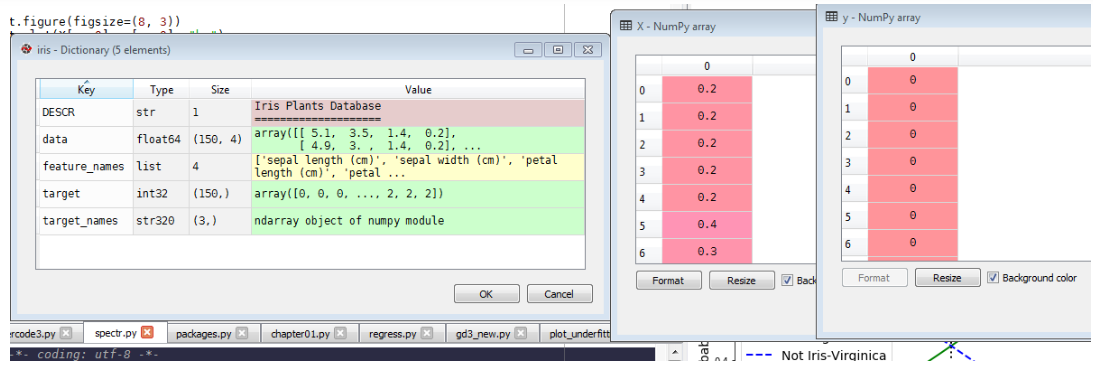

<font size =4 Color =blue> __Let's Do our first Logistic Regression!__ 

In [93]:
#Perform  Logistic regression with Scikit_Learn
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42,solver='lbfgs')
log_reg.fit(X, y)
print('theta_0,', "theta_1=", log_reg.intercept_[0],log_reg.coef_[0][0])
print("descision boundary=-theta_0/theta_1=",-log_reg.intercept_[0]/log_reg.coef_[0][0])

theta_0, theta_1= -7.194708301503786 4.333084596585778
descision boundary=-theta_0/theta_1= 1.6604126093390386


In [94]:
log_reg.score(X,y)

0.96

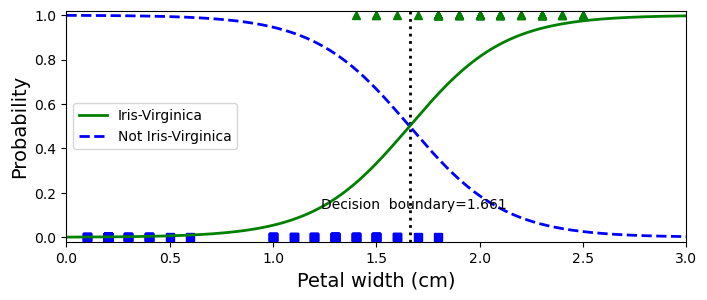

In [73]:
#Detailed Plot
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], 
         [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, 
         label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, 
         label="Not Iris-Virginica")
plt.text(decision_boundary+0.02, 0.13, 
         "Decision  boundary={0}".format(round(decision_boundary[0],3)), fontsize=10, color="k", ha="center")
# plt.arrow(decision_boundary, 0.08, -0.3, 0, 
#           head_width=0.05, head_length=0.1, fc='b', ec='b')
# plt.arrow(decision_boundary, 0.92, 0.3, 0, 
#           head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=10)
plt.axis([0, 3, -0.02, 1.02])
#save_fig("logistic_regression_plot")
plt.show()

<font size=4>Let's use our decision boundary to predict a class. Suppose we find two more records that are un-labled and we want to make a prediction based just on petal width. Let's say one has pedal with of 1.7 cm and the other 1.5cm. We don't need Python and Scikit_Learn to tell us our model will say the first is Virgininca and the second is not, but it will.

In [76]:
log_reg.predict([[1.7],[1.5]])

array([1, 0])

<font size=4> It will also give us probabilities. Notice the rows add to one.  More important fro multi-class problem.

In [77]:
log_reg.predict_proba([[3], [1.6]])

array([[0.00300477, 0.99699523],
       [0.56507207, 0.43492793]])

##  Log Regression- two features( pedal width, pedal length ) two classes( Virginica, not Virgininca)

<font size=4> In this example we  have two inputs $x_i$ and $y_i$ and  there are only two classes so $z_i$ is either 0 or 1. so our model has the form

$$h_\theta(x,y)=\sigma(\theta_0+\theta_1x+\theta_2y)=\frac{1}{1+e^{-\theta_0-\theta_1x-\theta_2y}}.$$

Perform the Logistic Regression with Scikit_Learn. For this case we will be using another parameter of the function.  

C : float, default: 1.0

Regularization is another way to account for over-fitting. Inverse of regularization strength; must be a positive float. Smaller values specify stronger regularization.

In [43]:
#Import Data

from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [96]:
# Two Inputs Binary Classes
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(int)

log_reg = LogisticRegression( C=10000,random_state=42,solver='lbfgs')# The C value 
log_reg.fit(X, y)

#x0, x1 = np.meshgrid(
#        np.linspace(2.9, 7, 500).reshape(-1, 1),
#        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
#    )
#X_new = np.c_[x0.ravel(), x1.ravel()]

#y_proba = log_reg.predict_proba(X_new)

print("theta_0,theta_1,theta_2=",   log_reg.intercept_[0],log_reg.coef_[0][0],log_reg.coef_[0][1])
log_reg.score(X,y)

theta_0,theta_1,theta_2= -45.22603514535829 5.750270405535925 10.431092645115905


0.96

<font size =4> Lets plot our predictions against the actual values.  The first 100 are not Virginica ( hence 0 value) and the last 50 are (hence one value).  

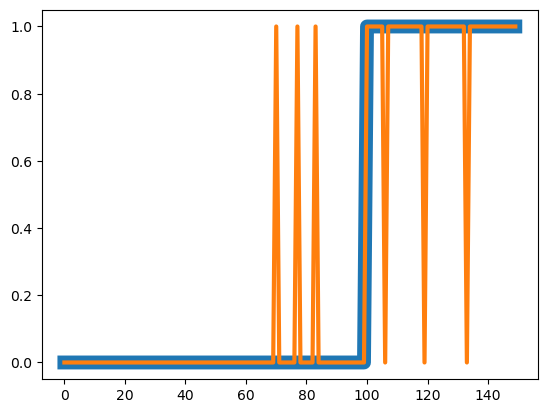

In [79]:
y_pred=np.around(log_reg.predict_proba(X))
y_pred=y_pred[:,1]
plt.plot(y,linewidth=10)
plt.plot(y_pred,linewidth=3)

<font size =4 color=blue>  __How many did we get wrong? What is our accuracy on the training set ?__  

<font color=brown size=4> __Answer:__

<font size=4> So the model is $$h(x,y)=\frac{1}{1+e^{45.23-5.75x-10.43y}}$$ 

<font size=4> How do we find the decision boundary line? That is when is the prediction 50% for each class? What is the math here?

In [80]:
#Find boundary line- remove # below for answwers.
b=-log_reg.intercept_[0]/log_reg.coef_[0][1]
m=-log_reg.coef_[0][0]/log_reg.coef_[0][1]
print('y=',m,"x +",b)

y= -0.5512625188146847 x + 4.335694896405147


##  Example 3- two features( pedal width, pedal length ) three  classes( Virginica,Versacolor,Setosa)

<font size=4>
    
In the multiple class case we need to output a probability for each case.  So now we need to find 

$$\Theta=\begin{bmatrix} \Theta_{0,0} &\Theta_{0,1} &\Theta_{0,2}\\
\Theta_{1,0} &\Theta_{1,1} &\Theta_{1,2}\\
\Theta_{2,0} &\Theta_{2,1} &\Theta_{2,2}\end{bmatrix}$$

$$\begin{align}h_\Theta(x,y)&=\langle h_{\Theta,0}(x,y), h_{\Theta,1}(x,y), h_{\Theta,2}(x,y)\rangle \\
\\&={\huge\langle} \frac{e^{\Theta_{0,0}+\Theta_{0,1}x+\Theta_{0,2}y}}{\sum_{j=0}^2e^{\Theta_{j,0}+\Theta_{j,1}x+\Theta_{j,2}y}},
\frac{e^{\Theta_{1,0}+\Theta_{1,1}x+\Theta_{1,2}y}}{\sum_{j=0}^2e^{\Theta_{j,0}+\Theta_{j,1}x+\Theta_{j,2}y}},
\frac{e^{\Theta_{,0}+\Theta_{2,1}x+\Theta_{2,2}y}}{\sum_{j=0}^2e^{\Theta_{j,0}+\Theta_{j,1}x+\Theta_{j,2}y}} {\huge
\rangle}
\end{align}$$

For the example below we get 
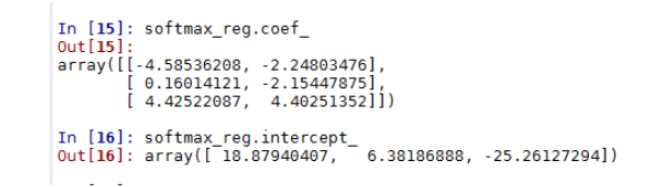

In general the number of $\Theta_{i,j}$ you will be looking for will be (number of inputs+1)\*(classes)

<font size=4>
Now we define the Loss function 

$$\begin{align} J(\Theta)&=-\frac{1}{2}\sum_{i=0}^2\sum_{j=0}^2 z_j^{(i)}log(h_{\Theta,j}(x_i,y_i))  \end{align}$$

* $z_j^{(i)}$ is 1 if the targe class for the $i^th$ instance is $j$ and 0 other wise. 

Try to compute the gradient of this

$$\nabla J=?????$$



For coding the gradient regression from scratch for the Softmax Classifer [this is a good example.](http://cs231n.github.io/neural-networks-case-study/) 

    
build a model using sklearn.  First get the data we need.

In [99]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]# all classes

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)
softmax_reg.score(X,y)

0.96

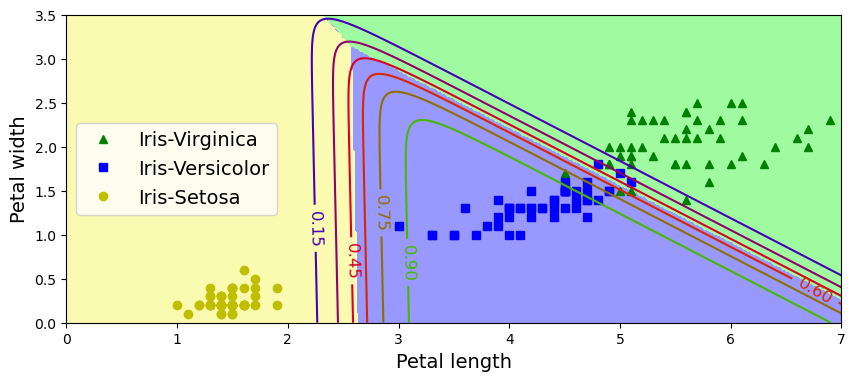

In [100]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

<font Size=4 color =blue> What do these mean?  Let's look at code.

How would you find the equation of the green curve corresponding to a 90% probability of class 1?   

<font size=4> 

* Make a prediction for flower with with petal length 4 and petal width 2.2? How confident are you?
* What about petal length 2 and petal width 1.5? 
* What about petal length 4 and petal width 1.5?


In [101]:
softmax_reg.predict([[4,2.22]]),softmax_reg.predict([[2,1.5]]),softmax_reg.predict([[4,1.5]])

(array([1]), array([0]), array([1]))

<font size=4> 

*  How confident are you in each of these predictions?

In [50]:
softmax_reg.predict_proba([[4,2.2]]),softmax_reg.predict_proba([[2,1.5]]),softmax_reg.predict_proba([[4,1.5]])

(array([[0.00067737, 0.53860608, 0.46071655]]),
 array([[9.46496340e-01, 5.35035680e-02, 9.17024105e-08]]),
 array([[0.00131938, 0.99009021, 0.00859041]]))

<font size=4 color =blue>__Exercise__ 
* What about petal length 6 and petal width 2? 
* What about petal length 2.5 and petal width 3? 

<font size=4 color =blue>__Exercise__ 
    

*  How confident are you in each of these predictions?

<font size=4 color =blue>__Exercise__ 
    

*  Rerun the model above but apply a standard scaler first. How does it affect the accuracy?